In [1]:
import cmath
import math
import numpy as np

In [2]:
D = 4000
R = 2000
lam = 0.532
d = 4
z = 50000
N = 1000

In [3]:
def RZ_circle(d, N, lam, z):
    U_triange = 0+0j
    
    for i in range(N//2):
        for k in range(i+1):
            x_c = 1.5*d + d*i
            y_c = 0.5*d + d*k
        
            r2 = x_c**2 + y_c**2
            r_min = (x_c - d/2) ** 2 + (y_c - d/2) ** 2 
            r_max = (x_c + d/2) ** 2 + (y_c + d/2) ** 2 
        
            x_min = x_c - d/2
            y_min = y_c - d/2
        
            x_max = x_c + d/2
            y_max = y_c + d/2
        
            d_newx = d
            d_newy = d
        
            if r_min > R**2:
                continue
            elif r_max > R**2 > r_min:
                x1 = x_max
                if R**2 < x_max**2 + y_min**2:
                    x1 = math.sqrt(R**2 - y_min**2)
            
                y1 = y_max
                if R**2 < y_max**2 + x_min**2:
                    y1 = math.sqrt(R**2 - x_min**2)
            
                d_newx = x1 - x_min
                d_newy = y1 - y_min
            
                x_c = x1 - d_newx/2
                y_c = y1 - d_newy/2
            
                r2 = x_c**2 + y_c**2
        
            r_c = math.sqrt(r2 + z**2)
        
            phi1 = math.pi * d_newx * x_c / (lam * r_c)
            phi2 = math.pi * d_newy * y_c / (lam * r_c)
        
            sinc = (math.sin(phi1) / phi1) * (math.sin(phi2) / phi2)
        
            U_c =complex(1/(2*math.pi*r_c), -1/lam) * z / (r_c**2) * cmath.exp(2*math.pi*r_c/lam * 1j) * sinc
        
            U_triange += U_c * d_newx * d_newy
    U_line = 0+0j

    for i in range(N//2):
        x_c = 0.5*d + d*i
        y_c = 0.5*d + d*i
    
        r2 = x_c**2 + y_c**2
        r_min = (x_c - d/2) ** 2 + (y_c - d/2) ** 2 
        r_max = (x_c + d/2) ** 2 + (y_c + d/2) ** 2 
    
        x_min = x_c - d/2
        y_min = y_c - d/2
    
        x_max = x_c + d/2
        y_max = y_c + d/2
            
        d_newx = d
        d_newy = d
    
        if r_min> R**2:
            continue
        elif r_max > R**2 > r_min:
            x1 = x_max
            if R**2 < x_max**2 + y_min**2:
                x1 = math.sqrt(R**2 - y_min**2)
            
            y1 = y_max
            if R**2 < y_max**2 + x_min**2:
                y1 = math.sqrt(R**2 - x_min**2)
            
            d_newx = x1 - x_min
            d_newy = y1 - y_min
            
            x_c = x1 - d_newx/2
            y_c = y1 - d_newy/2
            
            r2 = x_c**2 + y_c**2
        
        r_c = math.sqrt(r2 + z**2)
    
        phi1 = math.pi * d_newx * x_c / (lam * r_c)
        phi2 = math.pi * d_newy * y_c / (lam * r_c)
        
        sinc = (math.sin(phi1) / phi1) * (math.sin(phi2) / phi2)
        
        U_c =complex(1/(2*math.pi*r_c), -1/lam) * z / (r_c**2) * cmath.exp(2*math.pi*r_c/lam * 1j) * sinc
    
        U_line += U_c * d_newx * d_newy

    return 8*U_triange + 4*U_line

In [4]:
def ex_solution(lam, z, R):
    return cmath.exp(2*math.pi*z/lam * 1j) - z / math.sqrt(z**2 + R**2) * cmath.exp(2*math.pi*math.sqrt(z**2 + R**2)/lam * 1j)

In [5]:
U = np.zeros(1251, np.complex128)
U_exact = np.zeros(1251, np.complex128)

In [6]:
z = 47500

In [ ]:
for p in range(0, 1251):
    z += 10 * p
    U[p] = RZ_circle(d, N, lam, z)
    U_exact[p] = ex_solution(lam, z, R)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
Int = np.real(U * np.conjugate(U))

In [ ]:
Int_ex = np.real(U_exact * np.conjugate(U_exact))

In [ ]:
zz = np.arange(4.75, 6.0005, 0.001)

In [ ]:
U = U[200:]
U_exact = U_exact[200:]
Int=Int[200:]
Int_ex=Int_ex[200:]
zz = zz[200:]

In [ ]:
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(zz, Int, linewidth=3, label='numerical solution')
ax.plot(zz, Int_ex, label='the exact solution')

ax.set_xlabel('$z\,(cm)$')
ax.set_ylabel('Intensity $(U \\cdot U^{*})$')

ax.grid()
ax.legend(loc='lower right')

fig.savefig("en_intensity.png")

In [14]:
errors = abs(U - U_exact) / abs(U_exact) * 100

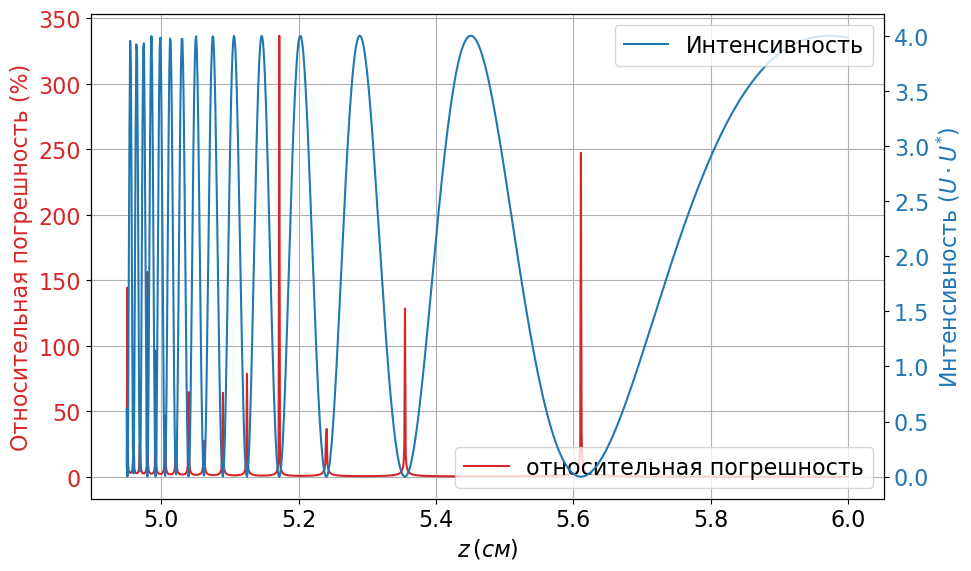

In [20]:
color = 'tab:red'
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(zz, errors, label='относительная погрешность', color = color)
ax1.set(xlabel='$z\,(см)$')
ax1.set_ylabel('Относительная погрешность (%)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='lower right')
ax1.grid()

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Интенсивность $(U \\cdot U^{*})$', color=color)
ax2.plot(zz, Int_ex, color=color, label='Интенсивность')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.savefig("errors.png")

In [25]:
np.mean(errors)

2.8697949041960515

In [26]:
np.argmax(errors)

222

In [27]:
indexes = np.argsort(errors)

In [38]:
indexes[-1:-20:-1]

array([222, 661,  30,   1, 405,  42, 175,  90, 140,  56, 291,  10, 662,
       290, 112, 660,  72,  19, 404], dtype=int64)

In [39]:
errors[404]

23.960604333445488

In [40]:
errors2= np.sort(errors)

In [49]:
errors3 = errors2[errors2 < 10]

In [50]:
len(errors3)

1013

In [51]:
len(errors2)

1051

In [52]:
np.mean(errors3)

1.125791259304

In [53]:
len(errors3)/len(errors2)

0.9638439581351094